In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tensorflow.keras.datasets import cifar10

### 1. Load and explore the dataset

In [5]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# Dataset shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


The CIFAR-10 dataset contains 50,000 training images and 10,000 test images.

Each image is 32x32 pixels with 3 color channels (RGB).

In [10]:
i = np.random.randint(len(x_train)) # random index within the range of number of images for training
image = x_train[i]

print(image)

[[[240 242 244]
  [232 240 247]
  [232 240 245]
  ...
  [197 205 203]
  [190 196 191]
  [197 200 193]]

 [[163 168 173]
  [139 151 160]
  [139 150 158]
  ...
  [124 131 133]
  [141 146 147]
  [157 159 157]]

 [[127 136 143]
  [ 98 113 124]
  [ 99 113 123]
  ...
  [101 108 114]
  [137 141 146]
  [156 157 160]]

 ...

 [[144 144 144]
  [ 92  92  92]
  [110 111 110]
  ...
  [ 26  24  37]
  [ 29  27  35]
  [ 54  50  51]]

 [[158 158 158]
  [106 106 106]
  [115 115 115]
  ...
  [ 90  90  95]
  [ 97  96  97]
  [115 112 107]]

 [[189 189 188]
  [170 170 168]
  [173 173 172]
  ...
  [224 225 223]
  [228 228 223]
  [235 232 224]]]


We see the image values ​​as a matrix, and they are the RGB values ​​of each pixel (values ​​between 0 and 255). Since each image is 32x32 pixels, it's an array of 32 arrays with 32 elements.

In [13]:
print(len(image))

32


Normalized values ​​from 0 to 1:

In [22]:
normalize_image = image/255.0
print(normalize_image)

[[[0.94117647 0.94901961 0.95686275]
  [0.90980392 0.94117647 0.96862745]
  [0.90980392 0.94117647 0.96078431]
  ...
  [0.77254902 0.80392157 0.79607843]
  [0.74509804 0.76862745 0.74901961]
  [0.77254902 0.78431373 0.75686275]]

 [[0.63921569 0.65882353 0.67843137]
  [0.54509804 0.59215686 0.62745098]
  [0.54509804 0.58823529 0.61960784]
  ...
  [0.48627451 0.51372549 0.52156863]
  [0.55294118 0.57254902 0.57647059]
  [0.61568627 0.62352941 0.61568627]]

 [[0.49803922 0.53333333 0.56078431]
  [0.38431373 0.44313725 0.48627451]
  [0.38823529 0.44313725 0.48235294]
  ...
  [0.39607843 0.42352941 0.44705882]
  [0.5372549  0.55294118 0.57254902]
  [0.61176471 0.61568627 0.62745098]]

 ...

 [[0.56470588 0.56470588 0.56470588]
  [0.36078431 0.36078431 0.36078431]
  [0.43137255 0.43529412 0.43137255]
  ...
  [0.10196078 0.09411765 0.14509804]
  [0.11372549 0.10588235 0.1372549 ]
  [0.21176471 0.19607843 0.2       ]]

 [[0.61960784 0.61960784 0.61960784]
  [0.41568627 0.41568627 0.41568627]


If we want to see the dataset's classes, we can find this information in the documentation on the official CIFAR-10 dataset website. There, we see that it has these 10 categories:

In [29]:
categories = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']

and to see the tag for a specific image:

In [32]:
print(f"Category index: {y_train[i][0]}")
print(f"Image category: {categories[y_train[i][0]]}")

Category index: 6
Image category: frog


### 2. View some images

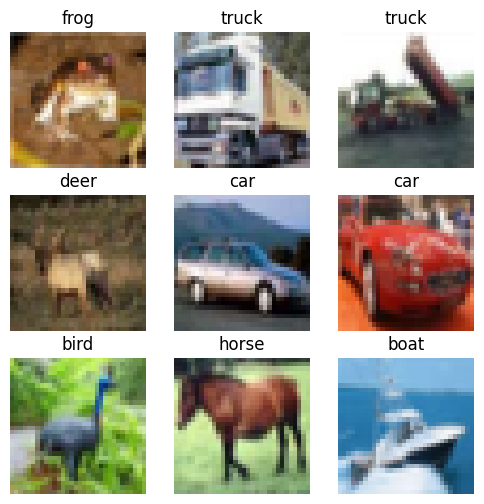

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])  
    ax.set_title(categories[y_train[i][0]])  
    ax.axis("off") # Remove axes
plt.show()

How many images there are of each class:

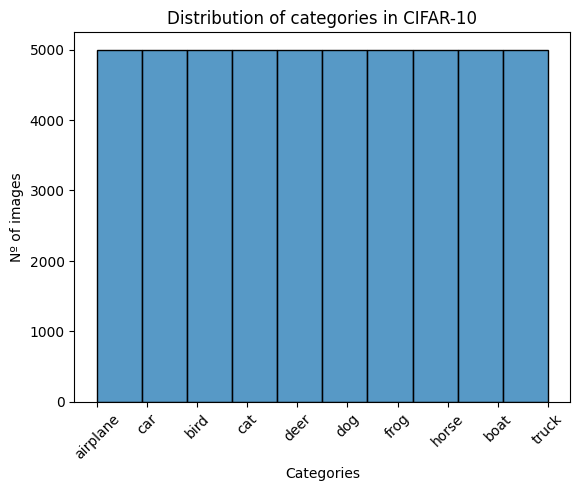

In [40]:
sns.histplot(y_train.flatten(), bins = 10, kde = False)
plt.xticks(range(10), categories, rotation = 45)
plt.xlabel('Categories')
plt.ylabel('Nº of images')
plt.title('Distribution of categories in CIFAR-10')
plt.show()

Since CIFAR-10 has a **balanced distribution**, each class has 5,000 images.

To view an image from a specific category:

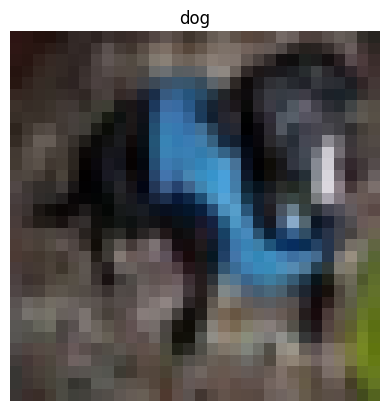

In [42]:
categorie_obj = 5
ind = np.where(y_train.flatten()==categorie_obj)[0] 

plt.imshow(x_train[ind[0]])
plt.title(categories[categorie_obj])
plt.axis("off")
plt.show()

### 3. Normalize the data

Images have values ​​between 0 and 255. To help the neural network learn better, we normalize the values ​​between 0 and 1.

In [46]:
x_train = x_train/255.0
x_test = x_test/255.0

### 4. Build the CNN Neural Network

- **First Layer** Conv2D
  - Applies 32 3x3 filters to the input image.
  - Uses ReLU (activation='relu') to introduce nonlinearity and improve learning.
  - The input image has size (32, 32, 3) (RGB with 3 channels).
- MaxPooling2D
  - Reduces the image dimension ((2,2)).
  - If the image was (32,32), it is now (15,15).
- **Second Layer** Conv2D
  - Now uses 64 filters instead of 32, detecting more complex patterns.
- Second MaxPooling2D
  - Further reduces the image dimension.
- **Third Layer** Conv2D
  - Uses 64 filters.
- Flatten
  - Converts the image to a vector so it can be passed to a traditional neural network.
- Dense Layer (Dense 64)
  - Connects all neurons to process the data.
- Output Layer (Dense 10)
  - Has 10 neurons because there are 10 classes in CIFAR-10.
  - The final activation is softmax, as it converts the output into probabilities for each class.

In [53]:
from tensorflow.keras import layers, models

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), # 1º convolutional layer
    layers.MaxPooling2D((2,2)), # Reduces dimensions

    layers.Conv2D(64, (3,3), activation = 'relu'), # 2º convolutional layer
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation = 'relu'), # 3º convolutional layer

    layers.Flatten(), # Convert the image to vector for the dense layer
    layers.Dense(64, activation = 'relu'), # Fully connected (hidden) layer
    layers.Dense(10, activation = 'softmax') # Final output layer for 10 categories
])
 
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Total parameters:
- 120,969 trainable parameters(The CNN has this nº of values that will be adjusted during training).
- Almost 500 KB of memory used: Efficient for a model of this scale.

### 5. Compile and train the model

- *adam*: Optimizer
- *sparse_categorical_crossentropy*: Loss function for classification.
- *epochs=10*: We train for 10 iterations.

In [ ]:
# Compile model
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5417 - accuracy: 0.4362 - val_loss: 1.3187 - val_accuracy: 0.5239
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1881 - accuracy: 0.5792 - val_loss: 1.0971 - val_accuracy: 0.6113
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0376 - accuracy: 0.6371 - val_loss: 1.0979 - val_accuracy: 0.6066
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9395 - accuracy: 0.6711 - val_loss: 0.9752 - val_accuracy: 0.6583
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8730 - accuracy: 0.6944 - val_loss: 0.9450 - val_accuracy: 0.6725
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8127 - accuracy: 0.7142 - val_loss: 0.9188 - val_accuracy: 0.6825
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7601 - accuracy: 0.7343 - val_loss: 0.8606 -

### 6. Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test accuracy: {test_acc: .2f}")

### 7. Predictions

We test the model with new images:

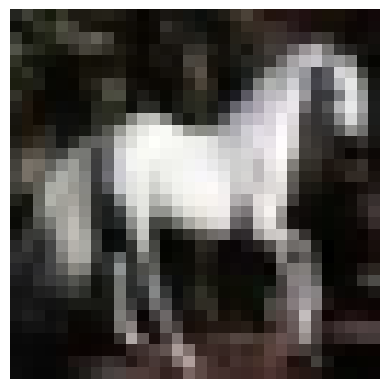

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicción: caballo


In [63]:
# We take an image of the test set
img = x_test[13]
plt.imshow(img)
plt.axis("off") 
plt.show()

# Make predictions
img = np.expand_dims(img, axis=0)  # Expand dimensions to match model input
pred = model.predict(img)

print(f"Prediction: {categories[np.argmax(pred)]}")